In [1]:
import sys
sys.path.append('..')
from dataset import spiral
import matplotlib.pyplot as plt

In [2]:
x, t = spiral.load_data()
print('x', x.shape)
print('t', t.shape)

x (300, 2)
t (300, 3)


In [3]:
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)
        
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        
        self.loss_layer = SoftmaxWithLoss()
        
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def forward(self, x, t):
        return self.loss_layer.forward(self.predict(x), t)
    
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

In [4]:
from common.optimizer import SGD
import numpy as np

In [5]:
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

In [6]:
model = TwoLayerNet(x[0].size, hidden_size, t[0].size)
optimizer = SGD(lr=learning_rate)

In [7]:
t[0].size

3

In [8]:
x[0].size

2

In [9]:
data_size = len(x)
max_iters = data_size//batch_size
total_loss = 0
loss_count = 0
loss_list = []

In [10]:
for epoch in range(max_epoch):
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]
    
    for iters in range(max_iters):
        batch_x = x[iters * batch_size: (iters+1) * batch_size]
        batch_t = t[iters * batch_size: (iters+1) * batch_size]
        
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        
        total_loss += loss
        loss_count += 1
        
        if (iters + 1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print("| epoch %d | repeat %d / %d | loss %.2f" 
                  % (epoch + 1, iters + 1, max_iters, avg_loss))
            loss_list += avg_loss
            total_loss, loss_count = 0, 0

| epoch 1 | repeat 10 / 10 | loss 1.13
| epoch 2 | repeat 10 / 10 | loss 1.13
| epoch 3 | repeat 10 / 10 | loss 1.12
| epoch 4 | repeat 10 / 10 | loss 1.12
| epoch 5 | repeat 10 / 10 | loss 1.11
| epoch 6 | repeat 10 / 10 | loss 1.14
| epoch 7 | repeat 10 / 10 | loss 1.16
| epoch 8 | repeat 10 / 10 | loss 1.11
| epoch 9 | repeat 10 / 10 | loss 1.12
| epoch 10 | repeat 10 / 10 | loss 1.13
| epoch 11 | repeat 10 / 10 | loss 1.12
| epoch 12 | repeat 10 / 10 | loss 1.11
| epoch 13 | repeat 10 / 10 | loss 1.09
| epoch 14 | repeat 10 / 10 | loss 1.08
| epoch 15 | repeat 10 / 10 | loss 1.04
| epoch 16 | repeat 10 / 10 | loss 1.03
| epoch 17 | repeat 10 / 10 | loss 0.96
| epoch 18 | repeat 10 / 10 | loss 0.92
| epoch 19 | repeat 10 / 10 | loss 0.92
| epoch 20 | repeat 10 / 10 | loss 0.87
| epoch 21 | repeat 10 / 10 | loss 0.85
| epoch 22 | repeat 10 / 10 | loss 0.82
| epoch 23 | repeat 10 / 10 | loss 0.79
| epoch 24 | repeat 10 / 10 | loss 0.78
| epoch 25 | repeat 10 / 10 | loss 0.82
| epoch 2

| epoch 211 | repeat 10 / 10 | loss 0.15
| epoch 212 | repeat 10 / 10 | loss 0.15
| epoch 213 | repeat 10 / 10 | loss 0.15
| epoch 214 | repeat 10 / 10 | loss 0.15
| epoch 215 | repeat 10 / 10 | loss 0.15
| epoch 216 | repeat 10 / 10 | loss 0.14
| epoch 217 | repeat 10 / 10 | loss 0.14
| epoch 218 | repeat 10 / 10 | loss 0.15
| epoch 219 | repeat 10 / 10 | loss 0.14
| epoch 220 | repeat 10 / 10 | loss 0.14
| epoch 221 | repeat 10 / 10 | loss 0.14
| epoch 222 | repeat 10 / 10 | loss 0.14
| epoch 223 | repeat 10 / 10 | loss 0.14
| epoch 224 | repeat 10 / 10 | loss 0.14
| epoch 225 | repeat 10 / 10 | loss 0.14
| epoch 226 | repeat 10 / 10 | loss 0.14
| epoch 227 | repeat 10 / 10 | loss 0.14
| epoch 228 | repeat 10 / 10 | loss 0.14
| epoch 229 | repeat 10 / 10 | loss 0.13
| epoch 230 | repeat 10 / 10 | loss 0.14
| epoch 231 | repeat 10 / 10 | loss 0.13
| epoch 232 | repeat 10 / 10 | loss 0.14
| epoch 233 | repeat 10 / 10 | loss 0.13
| epoch 234 | repeat 10 / 10 | loss 0.13
| epoch 235 | re

| 에폭 1 |  반복 10 / 10 | 손실 1.13
| 에폭 2 |  반복 10 / 10 | 손실 1.13
| 에폭 3 |  반복 10 / 10 | 손실 1.12
| 에폭 4 |  반복 10 / 10 | 손실 1.12
| 에폭 5 |  반복 10 / 10 | 손실 1.11
| 에폭 6 |  반복 10 / 10 | 손실 1.14
| 에폭 7 |  반복 10 / 10 | 손실 1.16
| 에폭 8 |  반복 10 / 10 | 손실 1.11
| 에폭 9 |  반복 10 / 10 | 손실 1.12
| 에폭 10 |  반복 10 / 10 | 손실 1.13
| 에폭 11 |  반복 10 / 10 | 손실 1.12
| 에폭 12 |  반복 10 / 10 | 손실 1.11
| 에폭 13 |  반복 10 / 10 | 손실 1.09
| 에폭 14 |  반복 10 / 10 | 손실 1.08
| 에폭 15 |  반복 10 / 10 | 손실 1.04
| 에폭 16 |  반복 10 / 10 | 손실 1.03
| 에폭 17 |  반복 10 / 10 | 손실 0.96
| 에폭 18 |  반복 10 / 10 | 손실 0.92
| 에폭 19 |  반복 10 / 10 | 손실 0.92
| 에폭 20 |  반복 10 / 10 | 손실 0.87
| 에폭 21 |  반복 10 / 10 | 손실 0.85
| 에폭 22 |  반복 10 / 10 | 손실 0.82
| 에폭 23 |  반복 10 / 10 | 손실 0.79
| 에폭 24 |  반복 10 / 10 | 손실 0.78
| 에폭 25 |  반복 10 / 10 | 손실 0.82
| 에폭 26 |  반복 10 / 10 | 손실 0.78
| 에폭 27 |  반복 10 / 10 | 손실 0.76
| 에폭 28 |  반복 10 / 10 | 손실 0.76
| 에폭 29 |  반복 10 / 10 | 손실 0.78
| 에폭 30 |  반복 10 / 10 | 손실 0.75
| 에폭 31 |  반복 10 / 10 | 손실 0.78
| 에폭 32 |  반복 10 

/home/arti/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/arti/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/arti/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/arti/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/arti/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/arti/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeW

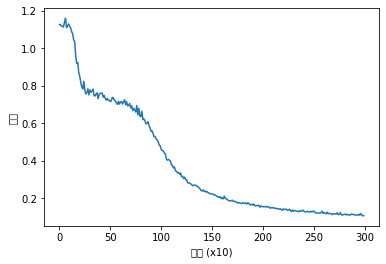

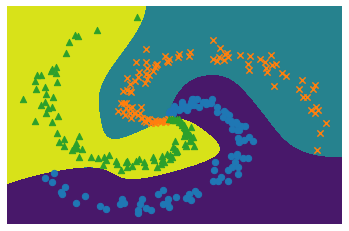

In [11]:
from train_custom_loop import *